In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from IPython.display import Audio
%matplotlib inline
import os

In [8]:
n_components = 4

In [9]:
A = np.eye(n_components)
A = np.where(A==0, 0.5, A)

In [10]:
np.linalg.cond(A)

4.999999999999999

In [13]:
# load mixed audio

In [27]:
f, x1 = scipy.io.wavfile.read('mixed_audios/2components/mixed_1.wav')

In [5]:
x1.shape

(559104,)

In [28]:
f, x2 = scipy.io.wavfile.read('mixed_audios/2components/mixed_2.wav')

In [7]:
x2.shape

(559104,)

In [29]:
X = np.array([x1, x2])

In [10]:
from sklearn.decomposition import FastICA

In [9]:
X.shape

(2, 559104)

In [19]:
# To do: whiten! 

In [30]:
transformer = FastICA(n_components=2, random_state=0, whiten=True)

In [31]:
S_est = transformer.fit_transform(X.T)

In [32]:
S_est.shape

(559104, 2)

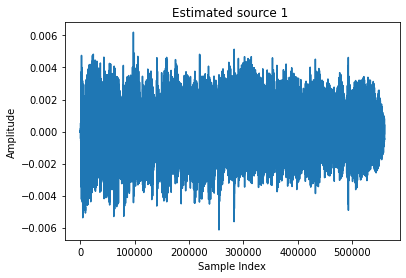

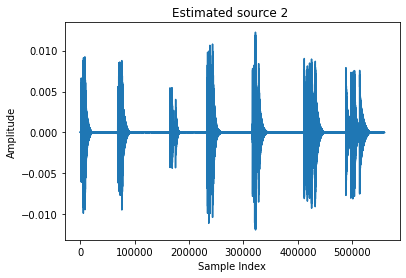

In [33]:
# Visualize, play and save mixed audios
for i in range(S_est.shape[1]):

    s = S_est[:,i]

    # plot waveform
    plt.figure()
    plt.plot(s)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.title('Estimated source %d ' % (i+1))
    plt.show()

    # Play audio
    aud = Audio(s, rate=f)
    display(aud)

In [43]:
f, s1 = scipy.io.wavfile.read('sources/acoustic.wav')

In [44]:
s1.shape

(559104,)

In [45]:
f, s2 = scipy.io.wavfile.read('sources/bubbles.wav')

In [46]:
S = np.array([s1, s2])

In [47]:
S.shape

(2, 559104)

In [49]:
S = S.T

In [48]:
S_est.shape

(559104, 2)

In [34]:
from mcc import mean_corr_coef as mcc

In [50]:
mcc(S_est, S)

0.9999915520475258